Name:Vivek Pawar

Andrew ID: vpawar

### Instructions
1. Fill in your name and Andrew ID.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it on Canvas to make sure that the code actually runs without errors. (**Important**: Any question for which your code fails to run will receive 0 points.)
5. Be care about where you save data for use with this Jupyter notebook (more details on this later).
6. Have fun!

### [Problem 1] Python Basics [10 pts]
This problem helps you get familiar with (or review) some basic Python operations. 

Consider the following two lists:

In [1]:
a = [13, 1, 55, 34, 2, 3, 89, 5, 8, 21]
b = [17,55, 34, 2, 3, 8, 9, 1, 4, 5, 6, 7, 20, 21, 36]

(a) [2 pts] Find the elements that are common between the lists and store it in a new list. Print the new list.

In [2]:
c = list(set(a).intersection(b))
print(c)

[1, 34, 3, 2, 5, 8, 21, 55]


(b) [3 pts] Write **one line** of code that takes this list of common elements and makes another new list that has only the even numbers of this list in it (hint: use a list comprehension). Print the new list.

In [3]:
[x for x in c if (x%2 == 0)]

[34, 2, 8]

(c) [5 pts] Write a function that takes a list as input, finds the maximum value in the list, and returns the maximum value as the output. (Do NOT use built-in `max()` function, or any other packages. Write it yourself.) Test the function with the list you generated in part (b) of this problem.

In [4]:
def max(l):
    Max = l[0]
    for i in l:
        if Max < i:
            Max = i
    return Max

max([x for x in c if (x%2==0)])

34

### [Problem 2] The Distribution of Words in a Human Language: Zipf's Law [45 pts]

In this problem, you will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English). As it turns out, when we look at the distribution of words in a different human languages, the distribution roughly follows what's called *Zipf's law* ([Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law)).

*Zipf's law* states that given a large sample of words used, any word's frequency is inversely proportional to its rank in the frequency table (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). In this problem, you are going to test Zipf's law on a real dataset and explore some of its properties.

This problem assumes you have already installed the `spaCy` package (https://spacy.io). Instructions for installing this are part of the tutorial file "`95-865 Anaconda and Jupyter setup tutorial.pdf`". You can find how to access lemmatized tokens using `spaCy` by looking at the `spaCy` demo Jupyter notebook from lecture (we have included it in this homework assignment as the file "`95-865 spaCy demo.ipynb`").

(a) [5 pts] Read the data files.

The dataset is a collection of the 100 most popular books downloaded from Gutenburg Project (https://www.gutenberg.org/browse/scores/top). Each file contains the text of a book. Now read all the texts from disk. This will be the corpus in this problem.

Note: Please DO NOT change the folder name or the path, and make sure you use a relative path (e.g. './HW1_Dataset/*filename*) when reading the files. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will receive 0 points for this problem if your code fails to load the data.**

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

`
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
`

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

In [99]:
import glob
import os

filenames = glob.glob('./HW1_Dataset/*.txt')  # list of all .txt files in the directory
with open('outfile.txt',"w", encoding="utf8") as output:
    for file in filenames:
        with open(file,'r',encoding="utf8") as intermediatefile:
            output.write(intermediatefile.read()+'\n')
F = open('outfile.txt',"r",encoding="utf8") 
data = F.read()
F.close()
os.remove("outfile.txt") 

(b) [15 pts] Build the frequency table. Specifically, complete the following three tasks:

  1. Process the text by separating and lemmatizing the words.
  2. Then count the number of times each word appears in the corpus and build a frequency table. (In particular, use raw counts as the "frequency"--do not divide by the total number of words in the corpus.)
  3. Sort the table and print the top 50 most frequent words, along with their frequencies and ranks.

Note: When counting the words, only include words (tokens) that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

`
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
`

In [101]:
import spacy
import re
nlp = spacy.load('en')  # load spaCy's built-in English models
parsed_text = nlp(data)

histogram = {}

for token in parsed_text:
    lemma = token.lemma_
    if re.match('[a-zA-Z]+$', lemma):
        if lemma in histogram:
            histogram[lemma] += 1
        else:
            histogram[lemma] = 1

sorted_lemma_count_pairs_entire_list  = sorted(histogram.items(),
                                 reverse=True,
                                 key=lambda x: x[1])
L = []
rank = 1
for lemma, count in sorted_lemma_count_pairs_entire_list:
    L.append((rank,lemma,count))
    rank = rank +1
    
L_50 = L[0:50]
for rank, lemma, count in L_50:
    print(rank, lemma,":", count)

1 the : 703040
2 be : 438284
3 and : 436049
4 of : 386402
5 to : 324526
6 a : 234146
7 in : 204369
8 have : 159582
9 that : 159142
10 not : 110600
11 with : 101248
12 for : 95439
13 as : 90860
14 but : 75888
15 do : 68888
16 at : 65031
17 on : 62908
18 by : 61992
19 this : 61343
20 which : 58932
21 all : 58822
22 say : 58566
23 from : 50107
24 so : 48117
25 or : 47838
26 will : 43115
27 one : 41275
28 man : 40159
29 no : 38567
30 what : 37922
31 there : 37287
32 if : 34981
33 go : 34025
34 when : 33646
35 would : 32745
36 come : 32497
37 an : 32470
38 see : 32059
39 who : 30950
40 make : 30450
41 then : 27360
42 may : 26984
43 out : 26898
44 know : 25607
45 more : 25528
46 up : 25383
47 good : 24814
48 take : 23975
49 shall : 23854
50 other : 23709


(c) [10 pts] Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes).

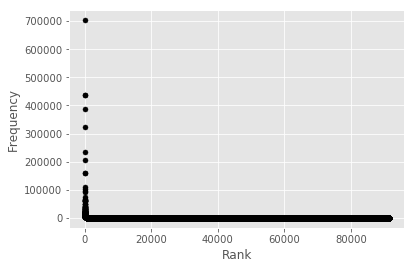

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
num_to_plot=len(L)
top_rank = [rank for rank, lemma, count in L[:num_to_plot]]
top_counts = [count for rank, lemma, count in L[:num_to_plot]]
plt.scatter(top_rank,top_counts, label='skitscat', color='k', s=25, marker="o")
plt.xlabel('Rank')
plt.ylabel('Frequency')

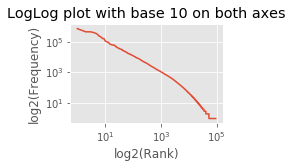

In [103]:
# Log-log plot
plt.subplot(223)
plt.style.use('ggplot') 
plt.loglog(top_rank, top_counts, basex=10, basey=10)
plt.grid(True)
plt.title('LogLog plot with base 10 on both axes')
plt.xlabel('log2(Rank)')
plt.ylabel('log2(Frequency)')

(d) [15 pts] Explore the frequency table: Zipf's law states that term frequency is governed by a power low, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant and is approximately 0.1*(corpus size) for English. 

Answer following questions:

- What do you observe in the log-log plot above? Is this consist with the power law?

Answer: The above log-log plot is consistent with the power law as we can see in log-log plot log of frequency is inversly proportional to log of rank (As with the increase in log value of rank, log value of frequecny decreases).

- Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphanumeric words). What is the probability of drawing one of the 4 most frequent words? What is the probability of drawing one of the 50 most frequent words? Answer these two questions using code rather than just entering in the final answers as numbers.

In [104]:
print('Probability of drawing one of the 4 most frequent words: ')
sumFrequency = sum([count for lemma, count in sorted_lemma_count_pairs_entire_list[:4]])
totalFrequency = sum([count for lemma, count in sorted_lemma_count_pairs_entire_list])
probFour = sumFrequency/totalFrequency
print(probFour)

print('Probability of drawing one of the 50 most frequent words: ')
sumFrequency = sum([count for lemma, count in sorted_lemma_count_pairs_entire_list[:50]])
totalFrequency = sum([count for lemma, count in sorted_lemma_count_pairs_entire_list])
probFifty = sumFrequency/totalFrequency
print(probFifty)

Probability of drawing one of the 4 most frequent words: 
0.18172385192473067
Probability of drawing one of the 50 most frequent words: 
0.4579131991513523


- What proportion of the words occur only once? What proportion of the words occur fewer than 10 times?

In [105]:
print("Occur only once: ")
countList = [count for lemma, count in sorted_lemma_count_pairs_entire_list]
countOne = countList.count(1)
totalCount = len(sorted_lemma_count_pairs_entire_list)
print(countOne," out of ", totalCount)

print("Occur fewer than 10 times: ")
countLessThanTen = sum(i < 10 for i in countList)
print(countLessThanTen," out of ",totalCount)

Occur only once: 
39453  out of  91421
Occur fewer than 10 times: 
69439  out of  91421


### [Problem 3] Entity Recognition and Pointwise Mutual Information (PMI) [40 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is http://localhost:8888/tree), start up Python and enter:

`
import nltk
nltk.download('reuters')
`

Then proceed to the problem subparts below.

(a) [12 pts] Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

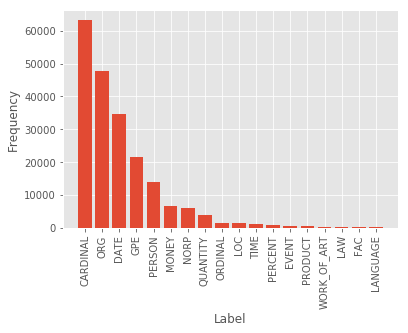

In [108]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
from operator import itemgetter
import re
import spacy
nlp = spacy.load('en')
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()
for i in range(len(reuters_nlp)):
    for entity in reuters_nlp[i].ents:
        label = entity.label_
        if label in label_counter:
            label_counter[label] += 1
        else:
            label_counter[label] = 1
            
sorted_label_count_pairs_entire_list  = sorted(label_counter.items(),
                                 reverse=True,
                                 key=lambda x: x[1])

plt.style.use('ggplot')  # prettier plots
num_of_labels_to_plot = len(sorted_label_count_pairs_entire_list)
label = [label for label, count in sorted_label_count_pairs_entire_list[:num_of_labels_to_plot]]
count = [count for label, count in sorted_label_count_pairs_entire_list[:num_of_labels_to_plot]]
plt.bar(range(num_of_labels_to_plot), count, align='center')
plt.xticks(range(num_of_labels_to_plot), label, rotation=90)
plt.xlabel('Label')
plt.ylabel('Frequency')

(b) [12 pts] Now list the top 10 most frequently occured entities (entity text and the number of occurence) with labels `ORG` (organization) and `GPE` (countries, cities, states) respectively.

In [116]:
from collections import Counter
from operator import itemgetter

histogram = Counter()
for i in range(len(reuters_nlp)):
    for entity in reuters_nlp[i].ents:
         if (entity.label_ == 'ORG'):
                entityText = entity.text
                if entityText in histogram:
                    histogram[entityText] += 1
                else:
                    histogram[entityText] = 1
                    
sorted_entity_count_pairs = sorted(histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))

sorted_entity_count_pairs_ten = sorted_entity_count_pairs[0:10]

print("ORG")
for entity, count in sorted_entity_count_pairs_ten:
    print(entity, ":", count)


histogram_gpe = Counter()
for i in range(len(reuters_nlp)):
    for entity in reuters_nlp[i].ents:
         if (entity.label_ == 'GPE'):
                entityText = entity.text
                if entityText in histogram_gpe:
                    histogram_gpe[entityText] += 1
                else:
                    histogram_gpe[entityText] = 1
                    
sorted_entity_count_pairs_gpe = sorted(histogram_gpe.items(),
                                  reverse=True,
                                  key=itemgetter(1))

sorted_entity_count_pairs_ten_gpe = sorted_entity_count_pairs_gpe[0:10]

print("\n")
print("GPE")       
for entity, count in sorted_entity_count_pairs_ten_gpe:
    print(entity, ":", count)

ORG
QTR : 915
EC : 837
USDA : 502
Reuters : 499
OPEC : 465
Fed : 395
CTS : 323
Bundesbank : 315
the Securities and Exchange Commission : 226
Treasury : 215


GPE
U.S. : 4330
Japan : 1336
the United States : 518
U.K. : 452
Brazil : 447
Canada : 356
Paris : 333
Washington : 327
China : 326
West Germany : 306


(c) [16 pts] Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? (Hint: To compute this ranking, you do not have to compute the full PMI equation.)

In [112]:
import math
from collections import Counter
from operator import itemgetter


GPE_OPEC_Count = Counter()
gpe_opec = {}
for doc in reuters_nlp:
    gpe_opec.clear()
    for entity in doc.ents:
        if('OPEC' in doc.string and entity.label_ =='GPE' and entity.lemma_ not in gpe_opec):
            GPE_OPEC_Count[entity.lemma_] +=1
            gpe_opec[entity.lemma_] = 'Yes'
            
gpe_count = Counter()
gpe= {}
for doc in reuters_nlp:
    gpe.clear()
    for entity in doc.ents:
        if (entity.label_ == "GPE" and entity.lemma_ not in gpe):
            gpe[entity.lemma_] = 'Yes'
            gpe_count[entity.lemma_] += 1
            
opec_count=Counter()
opec={}
for doc in reuters_nlp:
    opec.clear()
    for entity in doc.ents:
        if(entity.text =='OPEC'and entity.lemma_ not in opec):
            opec_count[entity.lemma_] +=1
            opec[entity.lemma_] = 'Yes'

list = []
for (key,val) in GPE_OPEC_Count.most_common():
    gpe_opec_key = key
    gpe_opec_val = val
    for (key,val) in gpe_count.most_common():
        gpe_key = key
        gpe_val = val
        if (gpe_opec_key == gpe_key):
            PMI = math.log(gpe_opec_val/gpe_val, 2)
            list.append((gpe_opec_key,PMI))

            
sorted_list = sorted(list,reverse=True,key=lambda x: x[1])
top_50 = sorted_list[0:50]

for gpe, count in top_50:
    print(gpe,":", count)
    
        




visnews : 0.0
guayaquil : 0.0
saudi arabian : 0.0
yanbu : 0.0
energy : 0.0
tripoli : 0.0
13-year low of : 0.0
japan indonesia 's : 0.0
aramco : 0.0
petromin : 0.0
september norway 's : 0.0
ekofisk : 0.0
ula : 0.0
statfjord : 0.0
sungari : 0.0
miraflores : 0.0
bethesda : 0.0
wellemeyer : 0.0
britian : 0.0
spa : 0.0
earthquake ecuador : 0.0
ras tanurah : 0.0
ju'aymah : 0.0
jubail : 0.0
bahrain deputy : 0.0
doha : 0.0
cantarell : 0.0
kittiwake : 0.0
stanlow : 0.0
vienna : -0.23446525363702297
riyadh : -0.3219280948873623
mercalli : -0.3219280948873623
balao : -0.5305147166987799
saudi arabia 's : -0.5405683813627028
quito : -0.5849625007211563
gabon : -0.5849625007211563
the united arab emirates : -0.6520766965796932
qatar : -0.7548875021634686
dubai : -0.8073549220576043
caracas : -1.0
abu dhabi : -1.0
minas : -1.0
ras tannurah : -1.0
opec : -1.0
gullfaks : -1.0
oseberg : -1.0
gulf arab : -1.0
amazon : -1.0
port jerome : -1.0
java : -1.0


The visnews at the top as a geopolitical entity is surprising and it might have occured because of the frequent occurance of the opec and visnews in the reuters articles. 

The Geopolotical entities like quatar, duabai ,UAE etc are not surprising because they are the major expoters of oil and petroleum. So it's expected to have opec organizations assoociation with these GPE's.

### [Problem 4] Questionnaire [5 pts]
Please provide feedback! To receive the 5 points, be sure to enter your Andrew ID correctly in this Google form:
https://goo.gl/forms/Q0cz2NhZbuIuS8iR2